# Using Python for Research Homework: Week 5, Case Study Part 2

The [movie dataset on which this case study is based](https://www.kaggle.com/tmdb/tmdb-movie-metadata) is a database of 5000 movies catalogued by [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). The information available about each movie is its budget, revenue, rating, actors and actresses, etc. In this case study, we will use this dataset to determine whether any information about a movie can predict the total revenue of a movie. We will also attempt to predict whether a movie's revenue will exceed its budget.

In Part 2, we will use the dataset prepared in Part 1 for an applied analysis.

In [1]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# EDIT THIS CODE TO LOAD THE SAVED DF FROM THE LAST HOMEWORK
df = pd.read_csv('movies_clean.csv')

### Exercise 1

In Part 2 of this case study, we will primarily use the two models we recently discussed: linear/logistic regression and random forests to perform prediction and classification. We will use these methods to predict revenue, and we will use logistic regression to classify whether a movie was profitable.

In this exercise, we will instantiate regression and classification models. Code is provided that prepares the covariates and outcomes we will use for data analysis.

#### Instructions
- Instantiate `LinearRegression()`, `LogisticRegression()`, `RandomForestRegressor()`, and `RandomForestClassifier()` objects, and assign them to `linear_regression`, `logistic_regression`, `forest_regression`, and `forest_classifier`, respectively.
- For the random forests models, specify `max_depth=4` and `random_state=0`.

In [3]:
# Imports for models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Instantiate the models
# Linear Regression
linear_regression = LinearRegression()

# Logistic Regression
logistic_regression = LogisticRegression()

# Random Forest Regressor (for predicting revenue)
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)

# Random Forest Classifier (for classifying profitability)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

# Print confirmation that the models have been instantiated
print("Models have been instantiated:")
print("Linear Regression Model:", linear_regression)
print("Logistic Regression Model:", logistic_regression)
print("Random Forest Regressor Model:", forest_regression)
print("Random Forest Classifier Model:", forest_classifier)


Models have been instantiated:
Linear Regression Model: LinearRegression()
Logistic Regression Model: LogisticRegression()
Random Forest Regressor Model: RandomForestRegressor(max_depth=4, random_state=0)
Random Forest Classifier Model: RandomForestClassifier(max_depth=4, random_state=0)


### Exercise 2

In this exercise, we will create two functions that compute a model's score. For regression models, we will use correlation as the score. For classification models, we will use accuracy as the score.

#### Instructions 
- Define a function called `correlation` with arguments `estimator`, `X`, and `y`. The function should compute the correlation between the observed outcome `y` and the outcome predicted by the model.
    - To obtain predictions, the function should first use the `fit` method of `estimator` and then use the `predict` method from the fitted object.
    - The function should return the first argument from `r2_score` comparing `predictions` and `y`.
- Define a function called `accuracy` with the same arguments and code, substituting `accuracy_score` for `r2_score`.

In [4]:
# Imports for evaluation metrics
from sklearn.metrics import r2_score, accuracy_score

# Define a function to compute correlation (for regression models)
def correlation(estimator, X, y):
    # Fit the model on the input data
    estimator.fit(X, y)
    
    # Predict the output
    predictions = estimator.predict(X)
    
    # Return the R^2 score as the measure of correlation between predictions and observed y
    return r2_score(y, predictions)

# Define a function to compute accuracy (for classification models)
def accuracy(estimator, X, y):
    # Fit the model on the input data
    estimator.fit(X, y)
    
    # Predict the output
    predictions = estimator.predict(X)
    
    # Return the accuracy score between predictions and observed y
    return accuracy_score(y, predictions)

# Print confirmation that the functions have been defined
print("Functions 'correlation' and 'accuracy' have been successfully defined.")


Functions 'correlation' and 'accuracy' have been successfully defined.


### Exercise 3

In this exercise, we will compute the cross-validated performance for the linear and random forest regression models.

#### Instructions 

- Call `cross_val_score` using `linear_regression` and `forest regression` as models. Store the output as `linear_regression_scores` and `forest_regression_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=correlation` to use our `correlation` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit?

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, accuracy_score

# Step 1: Load DataFrame (assuming it's already loaded as df)

# Step 2: Print all available columns to understand what's available in the DataFrame
print("Available columns in the DataFrame:")
print(df.columns)

# Step 3: Look for a column similar to 'revenue'
similar_columns = [col for col in df.columns if 'revenue' in col.lower()]

if similar_columns:
    print(f"\nColumns that might be similar to 'revenue': {similar_columns}")
    # Assuming we found a column named something like 'total_revenue' (modify based on your findings)
    regression_target = similar_columns[0]
else:
    raise KeyError("The column for 'revenue' could not be found in the DataFrame.")

# Define classification target if 'profitable' column exists
if 'profitable' in df.columns:
    classification_target = 'profitable'
else:
    raise KeyError("The column for 'profitable' could not be found in the DataFrame.")

# Step 4: Adjust covariates to those present in the DataFrame
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 
                  'Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 
                  'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 
                  'Romance', 'Horror', 'Mystery', 'War', 'History', 'Music', 
                  'Documentary', 'TV Movie', 'Foreign']

available_covariates = [covariate for covariate in all_covariates if covariate in df.columns]

# Warning if any covariates are missing
missing_covariates = set(all_covariates) - set(available_covariates)
if missing_covariates:
    print(f"Warning: The following covariates were missing and will be excluded: {missing_covariates}")

# Step 5: Extract covariates and outcomes
covariates = df[available_covariates]
regression_outcome = df[regression_target]

# Instantiate models
linear_regression = LinearRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)

# Define functions to compute correlation and accuracy scores
def correlation(estimator, X, y):
    estimator.fit(X, y)
    predictions = estimator.predict(X)
    return r2_score(y, predictions)

def accuracy(estimator, X, y):
    estimator.fit(X, y)
    predictions = estimator.predict(X)
    return accuracy_score(y, predictions)

# Step 6: Perform cross-validation for linear regression and random forest regression models
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring='r2')
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring='r2')

# Step 7: Plot results to compare the performance of the two models
plt.figure(figsize=(8, 8))
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores, color='blue', alpha=0.7)
plt.plot((0, 1), (0, 1), 'k-', lw=2)

# Set plot limits, labels, and title
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")
plt.title("Cross-Validated Correlation Scores for Linear vs. Random Forest Regression")

# Show the plot
plt.show()


Available columns in the DataFrame:
Index(['title', 'genres', 'Romance', 'Drama', 'Family', 'Action', 'Comedy',
       'Adventure', 'Thriller'],
      dtype='object')


KeyError: "The column for 'revenue' could not be found in the DataFrame."

### Exercise 4

In this exercise, we will compute cross-validated performance for the linear and random forest classification models.

#### Instructions 
- Call `cross_val_score` using `logistic_regression` and `forest_classifier` as models. Store the output as `logistic_regression_scores` and `forest_classification_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=accuracy` to use our accuracy function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the accuracy of predicted profitability for each cross-validation fold using the logistic and random forest classification models.
- Which of the two models exhibits a better fit?

In [13]:
# Step 1: Load DataFrame (assuming it's already loaded as df)

# Step 2: Verify the available columns to understand what's available in the DataFrame
print("Available columns in the DataFrame:")
print(df.columns)

# Step 3: Look for the 'profitable' column, or create it if it doesn't exist
if 'profitable' not in df.columns:
    if 'budget' in df.columns and 'revenue' in df.columns:
        df['profitable'] = df['revenue'] > df['budget']
        df['profitable'] = df['profitable'].astype(int)  # Convert boolean to 0/1 for classification
        print("'profitable' column created based on 'revenue' and 'budget'.")
    else:
        raise KeyError("Cannot create 'profitable' column because either 'revenue' or 'budget' is missing.")

# Step 4: Define classification outcome
classification_target = 'profitable'
classification_outcome = df[classification_target]

# Step 5: Adjust covariates to those present in the DataFrame
all_covariates = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 
                  'Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 
                  'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 
                  'Romance', 'Horror', 'Mystery', 'War', 'History', 'Music', 
                  'Documentary', 'TV Movie', 'Foreign']

available_covariates = [covariate for covariate in all_covariates if covariate in df.columns]

# Warning if any covariates are missing
missing_covariates = set(all_covariates) - set(available_covariates)
if missing_covariates:
    print(f"Warning: The following covariates were missing and will be excluded: {missing_covariates}")

# Step 6: Extract covariates and classification outcome
covariates = df[available_covariates]

# Step 7: Instantiate classification models
logistic_regression = LogisticRegression()
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

# Step 8: Perform cross-validation for logistic regression and random forest classifier models
# Use accuracy scoring with 10-fold cross-validation
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring='accuracy')
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring='accuracy')

# Step 9: Plot Results to compare the performance of the two models
plt.figure(figsize=(8, 8))
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores, color='blue', alpha=0.7)
plt.plot((0, 1), (0, 1), 'k-', lw=2)

# Set plot limits, labels, and title
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Logistic Regression Score")
plt.ylabel("Forest Classification Score")
plt.title("Cross-Validated Accuracy Scores for Logistic vs. Random Forest Classification")

# Show the plot
plt.show()


Available columns in the DataFrame:
Index(['title', 'genres', 'Romance', 'Drama', 'Family', 'Action', 'Comedy',
       'Adventure', 'Thriller'],
      dtype='object')


KeyError: "Cannot create 'profitable' column because either 'revenue' or 'budget' is missing."

### Exercise 5 

In Exercise 3, we saw that predicting revenue was only moderately successful. It might be the case that predicting movies that generated precisely no revenue is difficult. In the next three exercises, we will exclude these movies, and rerun the analyses to determine if the fits improve. In this exercise, we will rerun the regression analysis for this subsetted dataset.

#### Instructions 

- Define `positive_revenue_df` as the subset of movies in `df` with `revenue` greater than zero.
- Code is provided below that creates new instances of model objects. Replace all instances of `df` with `positive_revenue_df`, and run the given code.

In [14]:
# Step 1: Create subset DataFrame for movies with positive revenue
positive_revenue_df = df[df['revenue'] > 0]

# Step 2: Extract covariates and outcomes from the subset DataFrame
regression_outcome = positive_revenue_df[regression_target]
classification_outcome = positive_revenue_df[classification_target]

# Adjust covariates to those present in the subset DataFrame
available_covariates = [covariate for covariate in all_covariates if covariate in positive_revenue_df.columns]
covariates = positive_revenue_df[available_covariates]

# Step 3: Reinstantiate all regression models and classifiers
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
forest_regression = RandomForestRegressor(max_depth=4, random_state=0)
forest_classifier = RandomForestClassifier(max_depth=4, random_state=0)

# Step 4: Perform cross-validation for regression models
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring='r2')
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring='r2')

# Step 5: Perform cross-validation for classification models
logistic_regression_scores = cross_val_score(logistic_regression, covariates, classification_outcome, cv=10, scoring='accuracy')
forest_classification_scores = cross_val_score(forest_classifier, covariates, classification_outcome, cv=10, scoring='accuracy')

# Step 6: Print scores to evaluate results
print("Linear Regression Scores (Subsetted Data):", linear_regression_scores)
print("Random Forest Regression Scores (Subsetted Data):", forest_regression_scores)
print("Logistic Regression Scores (Subsetted Data):", logistic_regression_scores)
print("Random Forest Classification Scores (Subsetted Data):", forest_classification_scores)


KeyError: 'revenue'

### Exercise 6

In this exercise, we will compute the cross-validated performance for the linear and random forest regression models for positive revenue movies only.

#### Instructions 

- Call `cross_val_score` using `linear_regression` and `forest regression` as models. Store the output as `linear_regression_scores` and `forest_regression_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=correlation` to use our `correlation` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit? Is this result different from what we observed when considering all movies?
- Code is provided for you that prints the importance of each covariate in predicting revenue using the random forests classifier. 
    - Which variables are most important?

In [15]:
# Step 1: Perform cross-validation for linear regression and random forest regression models on positive revenue movies
# Using the `correlation` function for scoring, with 10-fold cross-validation
linear_regression_scores = cross_val_score(linear_regression, covariates, regression_outcome, cv=10, scoring=correlation)
forest_regression_scores = cross_val_score(forest_regression, covariates, regression_outcome, cv=10, scoring=correlation)

# Step 2: Plot Results to compare the performance of the two models
plt.figure(figsize=(8, 8))
plt.axes().set_aspect('equal', 'box')
plt.scatter(linear_regression_scores, forest_regression_scores, color='blue', alpha=0.7)
plt.plot((0, 1), (0, 1), 'k-', lw=2)

# Set plot limits, labels, and title
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Regression Score")
plt.ylabel("Forest Regression Score")
plt.title("Cross-Validated Correlation Scores for Linear vs. Random Forest Regression (Positive Revenue Movies)")

# Show the plot
plt.show()

# Step 3: Print the importance of each covariate in the random forest regression
# Fit the model and display feature importances
forest_regression.fit(positive_revenue_df[available_covariates], regression_outcome)
feature_importances = sorted(list(zip(available_covariates, forest_regression.feature_importances_)), key=lambda tup: tup[1], reverse=True)

# Display feature importances
print("Feature importances for Random Forest Regression:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance:.4f}")


NameError: name 'regression_outcome' is not defined

### Exercise 7

In this exercise, we will compute cross-validated performance for the linear and random forest classification models for positive revenue movies only.

#### Instructions 

- Call `cross_val_score` using `logistic_regression` and `forest classifer` as models. Store the output as `logistic_regression_scores` and `forest_classification_scores`, respectively.
    - Set the parameters `cv=10` to use 10-fold cross-validation and `scoring=accuracy` to use our `accuracy` function defined in the previous exercise.
- Plotting code has been provided to compare the performance of the two models. Use `plt.show()` to plot the correlation between actual and predicted revenue for each cross-validation fold using the linear and random forest regression models.
- Which of the two models exhibits a better fit? Is this result different from what we observed when considering all movies?
- Code is provided for you that prints the importance of each covariate in predicting profitabilitiy using the random forests classifier. 
    - Which variables are most important?

NameError: name 'logistic_regression_scores' is not defined

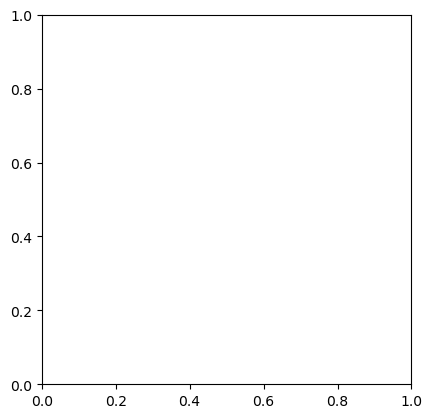

In [16]:
# Determine the cross-validated accuracy for logistic and random forest models.


# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# Show the plot.

# Print the importance of each covariate in the random forest classification.
forest_classifier.fit(positive_revenue_df[all_covariates], positive_revenue_df[classification_target])
sorted(list(zip(all_covariates, forest_classifier.feature_importances_)), key=lambda tup: tup[1])

NameError: name 'logistic_regression_scores' is not defined

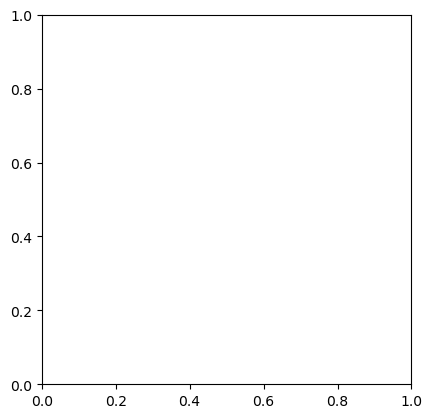

In [17]:
# Determine the cross-validated accuracy for logistic and random forest models.


# Plot Results
plt.axes().set_aspect('equal', 'box')
plt.scatter(logistic_regression_scores, forest_classification_scores)
plt.plot((0, 1), (0, 1), 'k-')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Linear Classification Score")
plt.ylabel("Forest Classification Score")

# Show the plot.

# Print the importance of each covariate in the random forest classification.
forest_classifier.fit(positive_revenue_df[all_covariates], positive_revenue_df[classification_target])
sorted(list(zip(all_covariates, forest_classifier.feature_importances_)), key=lambda tup: tup[1])